# This notebook is an exercise in data analysis.

### The data under analysis is the Kaggle Titanic dataset. Questions will be asked about a what attributes of a person predict their chances of surviving the accident.

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

## The variables relevant to the analysis:

In [2]:
fields = ['Survived', 'Pclass', 'Sex', 'Age','SibSp',
          'Parch', 'Fare', 'Cabin', 'Embarked']

In [3]:
df = pd.read_csv('./train.csv',usecols=fields)

## The sinking of the Titanic was a deadly event. 

In [4]:
total_people = len(df)

In [5]:
survived = df.loc[df["Survived"]==1]
total_survivors = len(survived)
prob_survived = total_survivors/total_people

In [6]:
perished = df.loc[df["Survived"]==0]
total_perished = len(perished)
prob_deceased = total_perished/total_people

In [7]:
print("{:.2f}% survived. {:.2f}% perished".\
      format(prob_survived*100,prob_deceased*100))

38.38% survived. 61.62% perished


Survived (%) | Perished (%)
--- | --- |
38.38 | 61.62

### You were more likely to perish on the Titanic than to survive.

==> $P(Survived) = 38.38\%$

==> $P(Deceased) = 61.62\%$

## What is the effect of gender on chances of survival?

In [8]:
prob_male = len(df.loc[df["Sex"]==\
                    "male"])/total_people

prob_female = len(df.loc[df["Sex"]==\
                    "female"])/total_people

In [9]:
print("{:.2f}% of the passengers are female. {:.2f}% are male".\
      format(prob_female*100,prob_male*100))

35.24% of the passengers are female. 64.76% are male


% Female | % Male
--- | --- |
35.24 | 64.76

You were more likely to come across a male on the Titanic that day.

==> $P(Female) = 35.24\%$

==> $P(Male)= 64.76\%$

In [10]:
female_survivors = len(survived.loc[survived["Sex"]=="female"])
male_survivors = len(survived.loc[survived["Sex"]=="male"])

In [11]:
prob_female_survived = female_survivors/total_survivors
prob_male_survived = male_survivors/total_survivors

print("{:.2f}% of survivors are female. {:.2f}% of survivors are male"\
      .format(prob_female_survived*100,prob_male_survived*100))

68.13% of survivors are female. 31.87% of survivors are male


Gender | survival chance (%)
--- | --- |
Female | 68.13
Male | 31.87

It can be seen that the probability that a survivor is female is 68.13\%.

==> $P(Female | Survived) = 68.13\%$

The probability that a survivor is male is 31.87\%.

==> $P(Male | Survived) = 31.87\%$

In [12]:
female_deceased = len(perished.loc[perished["Sex"]=="female"])
male_deceased = len(perished.loc[perished["Sex"]=="male"])

In [13]:
prob_female_deceased = female_deceased/total_perished
prob_male_deceased = male_deceased/total_perished

print("{:.2f}% of the deceased are female. {:.2f}% of the \
deceased are male".format(prob_female_deceased*100,prob_male_deceased*100))

14.75% of the deceased are female. 85.25% of the deceased are male


Gender | perish chance (%)
--- | --- |
Female | 14.75
Male | 85.25

It can be seen that the probability that the person deceased is female is 14.75\%.

==> $P(Female | Deceased) = 14.75\%$

The probability that person deceased is male is 85.25\%.

==> $P(Male | Deceased) = 85.25\%$

## Using Bayes' Theorem, you can now calculate the probability that a person survived or died given their gender by making use of the probabilities calculated above:

$P(Survived) = 38.38\%$

$P(Deceased) = 61.62\%$

$P(Female) = 35.24\%$

$P(Male)= 64.76\%$

$P(Female | Survived) = 68.13\%$

$P(Male | Survived) = 31.87\%$

$P(Female | Deceased) = 14.75\%$

$P(Male | Deceased) = 85.25\%$

## The probabilities of surviving or dying with respect to gender are as follows:



### Probability of survival given the person is female is:


$P(Survived | Female) = \dfrac{P(Female|Survived)\cdot P(Survived)}{P(Female)} = \dfrac{0.6813 \cdot 0.3838}{0.3524} = 74.20\%$

In [14]:
prob_survived_female = (prob_female_survived*prob_survived)/prob_female
print("{:.2f}%".format(prob_survived_female*100))

74.20%


### Probability of being deceased given the person is female is:

$P(Deceased | Female) = \dfrac{P(Female|Deceased)\cdot P(Deceased)}{P(Female)} = \dfrac{0.1475 \cdot 0.6162}{0.3524} = 25.80\%$

In [15]:
prob_deceased_female = (prob_female_deceased*prob_deceased)/prob_female
print("{:.2f}%".format(prob_deceased_female*100))

25.80%


### Probability of survival given the person is male is:

$P(Survived | Male) = \dfrac{P(Male|Survived)\cdot P(Survived)}{P(Male)} = \dfrac{0.3187 \cdot 0.3838}{0.6476} = 18.89\%$

In [16]:
prob_survived_male = (prob_male_survived*prob_survived)/prob_male
print("{:.2f}%".format(prob_survived_male*100))

18.89%


### Probability of being deceased given the person is male is:

$P(Deceased | Male) = \dfrac{P(Male|Deceased)\cdot P(Deceased)}{P(Male)} = \dfrac{0.8525 \cdot 0.3838}{0.6476}= 81.11\%$

In [17]:
prob_deceased_male = (prob_male_deceased*prob_deceased)/prob_male
print("{:.2f}%".format(prob_deceased_male*100))

81.11%


## It is quite obvious that gender has an effect surviving the sinking of the Titanic.

In [18]:
import seaborn as sb

In [52]:
x, y, hue = "Probability", "Sex", "Survived"

In [98]:
plot_df = df["Sex"].groupby(df["Survived"]).value_counts(normalize=True).rename("Probability").reset_index()
# new_df = new_df.mul(100).rename('Percent').reset_index()

(0.0, 1.0)

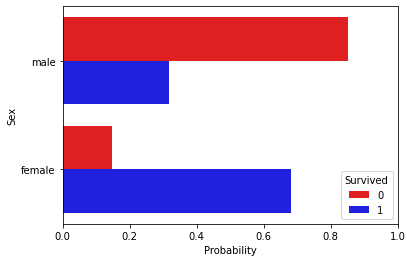

In [132]:
g = sb.barplot(data=plot_df,x="Probability",y="Sex",hue="Survived",palette=["r","b"])
g.set_xlim(0,1)
# for p in g.patches:
#     print(p)
#     txt = str(p.get_width().round(4))
#     txt_x = p.get_y()
#     txt_y = p.get_width()
#     g.text(txt_x,txt_y,txt)

In [154]:
plot_df

,Survived,Sex,Probability
0,0,male,0.852459
1,0,female,0.147541
2,1,female,0.681287
3,1,male,0.318713


In [128]:
for p in g.patches:
    print(p)
    txt = str(p.get_width().round(4))
    txt_x = p.get_width()
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)

Rectangle(xy=(0, -0.4), width=0.852459, height=0.4, angle=0)
Rectangle(xy=(0, 0.6), width=0.147541, height=0.4, angle=0)
Rectangle(xy=(0, -2.77556e-17), width=0.318713, height=0.4, angle=0)
Rectangle(xy=(0, 1), width=0.681287, height=0.4, angle=0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


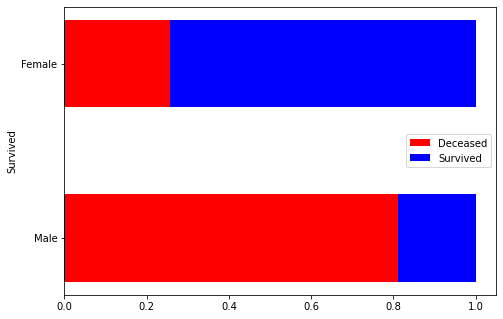

In [158]:
fig = plt.figure()
ax = fig.add_axes([0,1,1,1])

classes = range(0,2)
width = .5
male_chances = [prob_survived_male, prob_deceased_male]
female_chances = [prob_survived_female, prob_deceased_female]

survival_chances = [prob_survived_male,prob_survived_female]
deceased_chances = [prob_deceased_male,prob_deceased_female]

ax.barh(classes,deceased_chances,width, color= "r", tick_label = ("Male","Female"))
ax.barh(classes,survival_chances,width,left = deceased_chances, color= "b")

ax.set_ylabel("Survived")
ax.set_yticks(classes,("Male","Female"))
ax.legend(labels = ("Deceased","Survived"))

In [152]:
prob_deceased_female

0.2579617834394904

In [153]:
prob_survived_female

0.7420382165605095